In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('Telco-Customer-Churn.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [28]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [29]:
df.dropna(inplace=True)

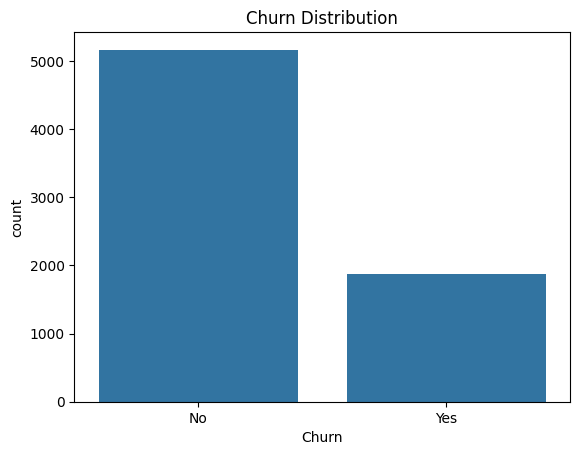

In [30]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

C:\Users\GTBL\AppData\Local\Temp\ipykernel_9124\1876282591.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], label='No Churn', shade=True)
C:\Users\GTBL\AppData\Local\Temp\ipykernel_9124\1876282591.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churn', shade=True)


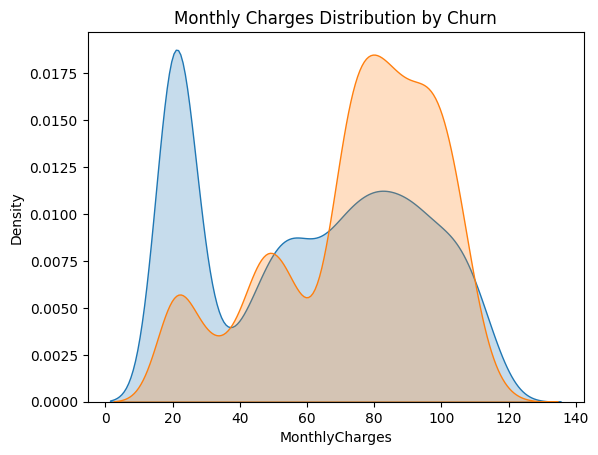

In [31]:
sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], label='No Churn', shade=True)
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churn', shade=True)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

In [32]:
df = df.drop('customerID', axis=1)

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Churn')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Encode the target variable 'Churn'
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn']) # No=0, Yes=1

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [34]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model_pipeline.predict(X_test)

Accuracy: 0.8038

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



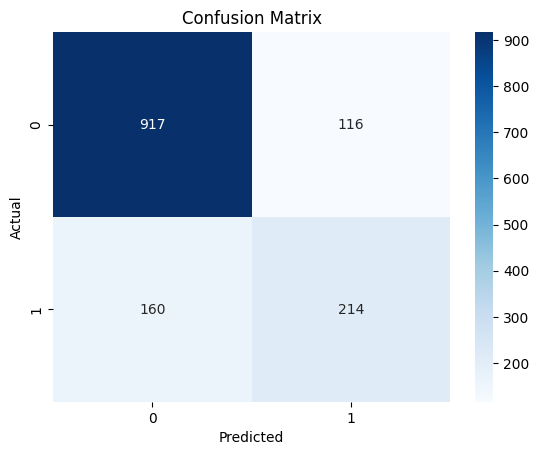

In [38]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
import joblib

# Save the pipeline to a file
joblib.dump(model_pipeline, 'churn_model_pipeline.pkl')
print("Model pipeline saved as churn_model_pipeline.pkl")

Model pipeline saved as churn_model_pipeline.pkl


In [40]:
# app.py
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Initialize the Flask app
app = Flask(__name__)

# Load the trained model pipeline
model_pipeline = joblib.load('churn_model_pipeline.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data from the request
    data = request.get_json(force=True)

    # Convert the JSON data into a pandas DataFrame
    # The keys in the JSON must match the feature names the model was trained on
    input_data = pd.DataFrame([data])

    # Make a prediction
    prediction = model_pipeline.predict(input_data)
    probability = model_pipeline.predict_proba(input_data)

    # Get the churn probability
    churn_prob = probability[0][1] # Probability of class '1' (Churn)

    # Return the response as JSON
    return jsonify({
        'prediction': 'Churn' if prediction[0] == 1 else 'No Churn',
        'churn_probability': f"{churn_prob:.4f}"
    })

if __name__ == '__main__':
    app.run(debug=True, port=5000)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

D:\SABBIR\churn_prediction\venv\Lib\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# test_api.py
import requests
import json

# URL of our local Flask app
URL = 'http://127.0.0.1:5000/predict'

# Example customer data (must match the model's expected features)
# This is one row from our original dataset
customer_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}

# Send a POST request with the data
response = requests.post(URL, json=customer_data)

# Print the result
print("API Response:")
print(response.json())

In [41]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# --- Model 1: Logistic Regression (our baseline) ---
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])
pipeline_lr.fit(X_train, y_train)
print("--- Logistic Regression Report ---")
print(classification_report(y_test, pipeline_lr.predict(X_test)))


# --- Model 2: Random Forest ---
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])
pipeline_rf.fit(X_train, y_train)
print("\n--- Random Forest Report ---")
print(classification_report(y_test, pipeline_rf.predict(X_test)))


# --- Model 3 & Tuning: XGBoost with GridSearchCV ---
# Define the pipeline for XGBoost
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Use scale_pos_weight for imbalance instead of class_weight
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Define the grid of hyperparameters to search
# This is a small grid for speed. A real search would be larger.
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__scale_pos_weight': [3] # Ratio of negative to positive class, good for imbalance
}

# Create the GridSearchCV object
# cv=3 means 3-fold cross-validation. scoring='f1' optimizes for F1-score.
grid_search = GridSearchCV(pipeline_xgb, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

print("\n--- Starting XGBoost Hyperparameter Tuning... ---")
grid_search.fit(X_train, y_train)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best F1-score on CV: {grid_search.best_score_:.4f}")

# Evaluate the BEST model on the test set
best_model = grid_search.best_estimator_
print("\n--- Tuned XGBoost Final Report on Test Set ---")
print(classification_report(y_test, best_model.predict(X_test)))

# IMPORTANT: Save your new, best model for deployment
import joblib
joblib.dump(best_model, 'churn_model_tuned_xgb.pkl')

--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407


--- Random Forest Report ---
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407


--- Starting XGBoost Hyperparameter Tuning... ---
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best parameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 3}
Best F1-score 

D:\SABBIR\churn_prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:47:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['churn_model_tuned_xgb.pkl']